Scroll to bottom to see eda conclusion and model implementations

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
plt.style.use('dark_background')

In [189]:
df = pd.read_csv(r"./adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [190]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Axes: ylabel='Density'>

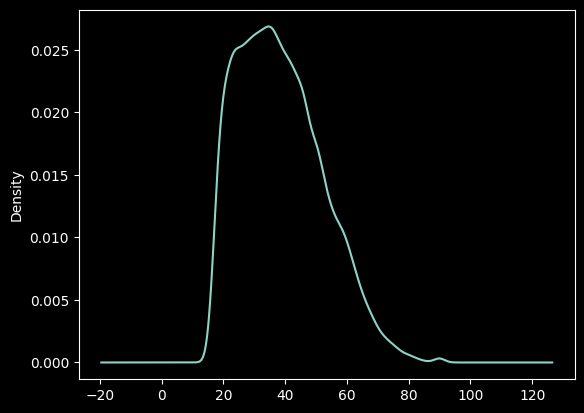

In [192]:
df['age'].plot(kind='kde')

income
<=50K    Axes(0.125,0.11;0.775x0.77)
>50K     Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

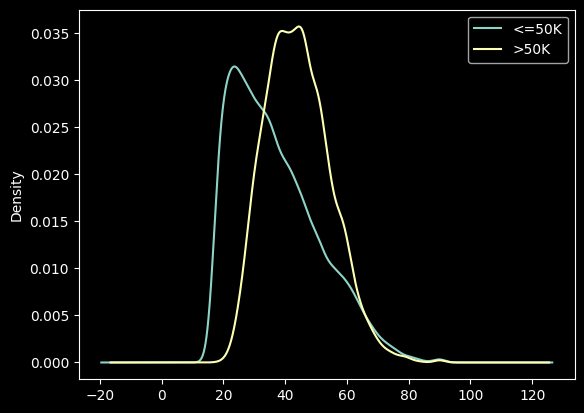

In [193]:
df.groupby('income')['age'].plot(kind='kde',legend=True)

income
<=50K    Axes(0.125,0.11;0.775x0.77)
>50K     Axes(0.125,0.11;0.775x0.77)
Name: hours.per.week, dtype: object

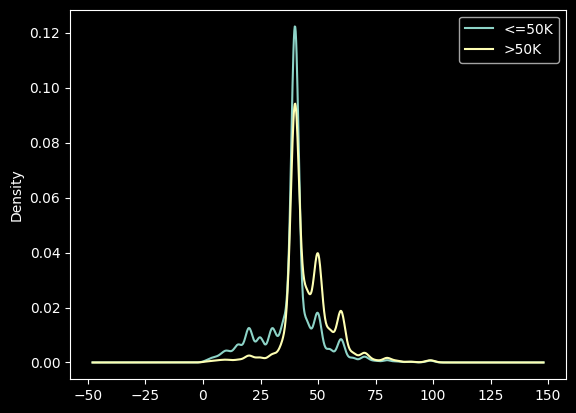

In [194]:
df.groupby('income')['hours.per.week'].plot(kind='kde',legend=True)

In [195]:
pd.crosstab(df['occupation'],df['workclass'])

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
occupation,,,,,,,,,
?,1836,0,0,7,0,0,0,0,0
Adm-clerical,0,317,283,0,2833,31,50,253,3
Armed-Forces,0,9,0,0,0,0,0,0,0
Craft-repair,0,64,146,0,3195,106,531,56,1
Exec-managerial,0,180,214,0,2691,400,392,189,0
Farming-fishing,0,8,29,0,455,51,430,15,6
Handlers-cleaners,0,23,47,0,1273,2,15,9,1
Machine-op-inspct,0,14,12,0,1913,13,36,13,1
Other-service,0,35,193,0,2740,27,175,124,1


In [196]:
pd.crosstab(df['education'],df['occupation'])

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
education,,,,,,,,,,,,,,,
10th,102,38,0,170,24,44,71,101,194,6,9,6,81,3,84
11th,119,67,0,175,34,37,123,99,238,14,20,7,144,6,92
12th,40,38,1,58,13,16,38,35,85,4,10,6,47,3,39
1st-4th,12,0,0,23,4,18,16,23,40,11,4,1,8,0,8
5th-6th,30,6,0,43,1,36,40,56,64,14,1,1,12,1,28
7th-8th,73,11,0,116,19,70,46,93,98,8,9,9,29,5,60
9th,51,14,0,96,13,28,49,76,101,10,3,4,32,2,35
Assoc-acdm,47,193,0,115,145,14,24,33,78,2,138,34,144,73,27
Assoc-voc,61,167,0,252,150,52,28,63,115,4,170,48,106,126,40


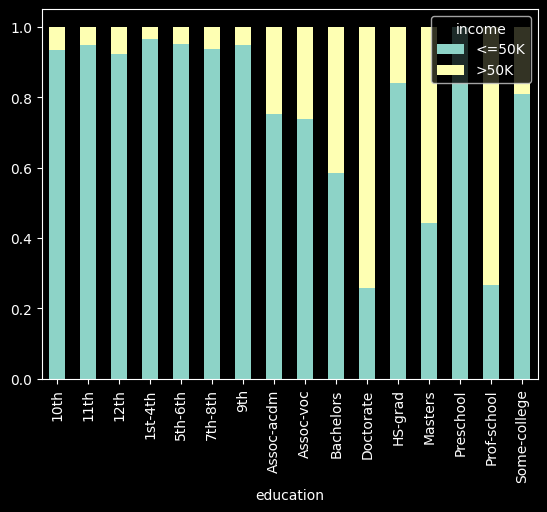

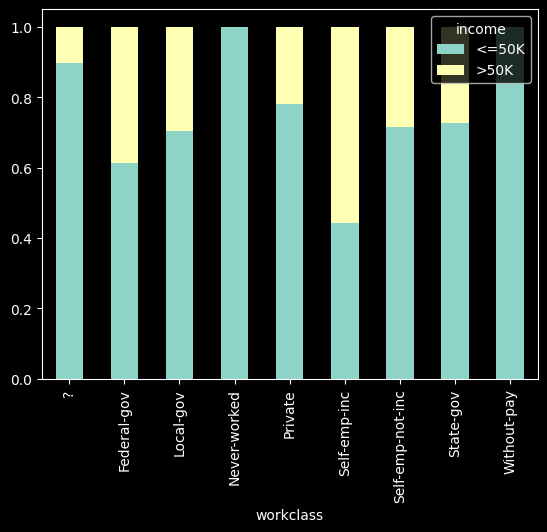

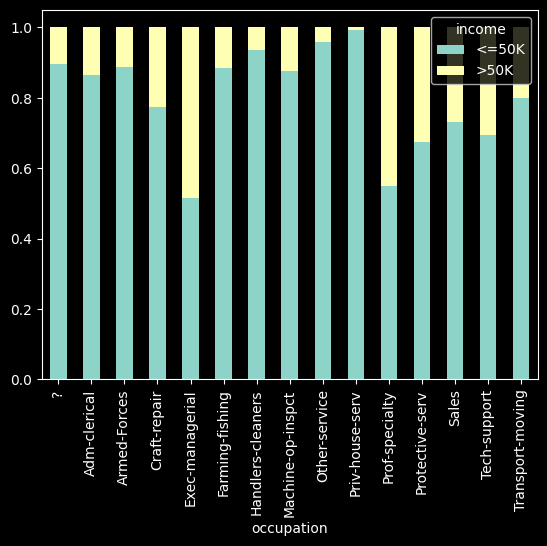

In [197]:
pd.crosstab(df['education'],df['income'],normalize='index').plot(kind='bar',legend=True,stacked=True)
plt.show()
pd.crosstab(df['workclass'],df['income'],normalize='index').plot(kind='bar',legend=True,stacked=True)
plt.show()
pd.crosstab(df['occupation'],df['income'],normalize='index').plot(kind='bar',legend=True,stacked=True)
plt.show()

In [198]:
print(df.groupby(['occupation','education'])['income'].value_counts().to_string())

occupation         education     income
?                  10th          <=50K      100
                                 >50K         2
                   11th          <=50K      119
                   12th          <=50K       38
                                 >50K         2
                   1st-4th       <=50K       12
                   5th-6th       <=50K       28
                                 >50K         2
                   7th-8th       <=50K       71
                                 >50K         2
                   9th           <=50K       50
                                 >50K         1
                   Assoc-acdm    <=50K       41
                                 >50K         6
                   Assoc-voc     <=50K       48
                                 >50K        13
                   Bachelors     <=50K      128
                                 >50K        45
                   Doctorate     >50K        11
                                 <=50K        4


In [199]:
print(df.groupby(['occupation','race'])['income'].value_counts().to_string())

occupation         race                income
?                  Amer-Indian-Eskimo  <=50K       23
                                       >50K         2
                   Asian-Pac-Islander  <=50K       60
                                       >50K         5
                   Black               <=50K      206
                                       >50K         9
                   Other               <=50K       21
                                       >50K         2
                   White               <=50K     1342
                                       >50K       173
Adm-clerical       Amer-Indian-Eskimo  <=50K       28
                                       >50K         3
                   Asian-Pac-Islander  <=50K      117
                                       >50K        22
                   Black               <=50K      448
                                       >50K        42
                   Other               <=50K       25
                                    

In [200]:
pd.crosstab(df['native.country'],df['race'],normalize='index').sort_values(by='White',ascending=False)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
native.country,,,,,
Yugoslavia,0.000000,0.000000,0.000000,0.000000,1.000000
Scotland,0.000000,0.000000,0.000000,0.000000,1.000000
Italy,0.000000,0.000000,0.000000,0.000000,1.000000
Hungary,0.000000,0.000000,0.000000,0.000000,1.000000
Holand-Netherlands,0.000000,0.000000,0.000000,0.000000,1.000000
Canada,0.000000,0.008264,0.000000,0.008264,0.983471
Poland,0.000000,0.016667,0.000000,0.000000,0.983333
Portugal,0.000000,0.027027,0.000000,0.000000,0.972973
Peru,0.000000,0.000000,0.000000,0.032258,0.967742


In [201]:
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [202]:
#df['native.country'] = np.where(df['native.country']=='United-States','United-States','Other')

<Axes: xlabel='race'>

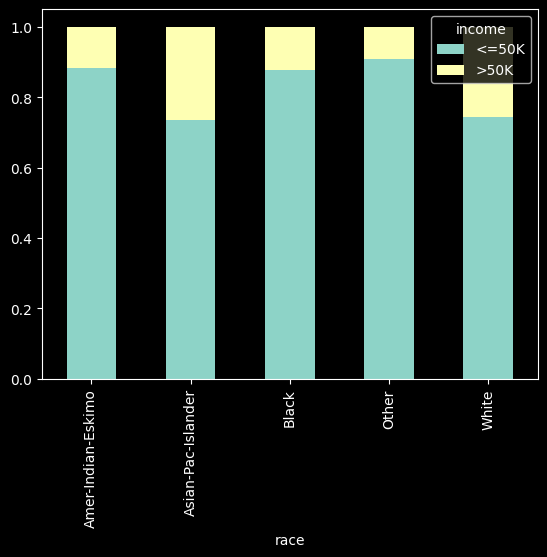

In [203]:
pd.crosstab(df['race'],df['income'],normalize='index').plot(kind='bar',stacked=True)

<Axes: xlabel='native.country'>

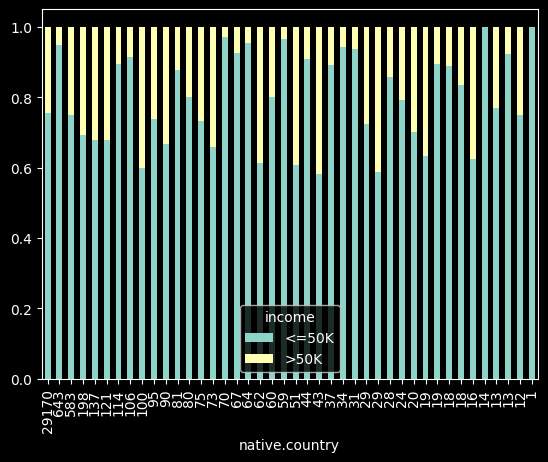

In [204]:
sdf = pd.crosstab(df['native.country'],df['income'],normalize='index')
sdf = sdf.reset_index()
sdf['native.country'] = sdf['native.country'].map(df['native.country'].value_counts())
sdf = sdf.sort_values(by='native.country',ascending=False)
sdf.set_index('native.country').plot(kind='bar',stacked=True)


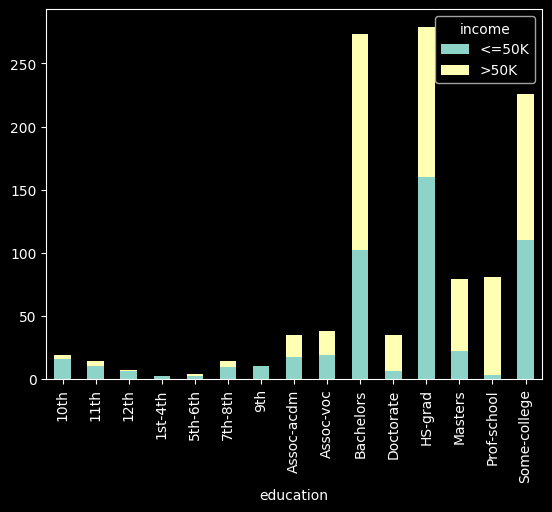

In [205]:
dfS = df[df['workclass']=='Self-emp-inc']
pd.crosstab(dfS['education'],dfS['income']).plot(kind='bar',legend=True,stacked=True)
plt.show()

In [206]:
pd.crosstab(df['marital.status'],df['income'],normalize='index')*100

income,<=50K,>50K
marital.status,,
Divorced,89.579113,10.420887
Married-AF-spouse,56.521739,43.478261
Married-civ-spouse,55.315171,44.684829
Married-spouse-absent,91.866029,8.133971
Never-married,95.403913,4.596087
Separated,93.560976,6.439024
Widowed,91.440081,8.559919


In [207]:
pd.crosstab(df['relationship'],df['income'],normalize='index')*100

income,<=50K,>50K
relationship,,
Husband,55.142879,44.857121
Not-in-family,89.692956,10.307044
Other-relative,96.228338,3.771662
Own-child,98.677979,1.322021
Unmarried,93.673825,6.326175
Wife,52.487245,47.512755


<Axes: xlabel='income', ylabel='age'>

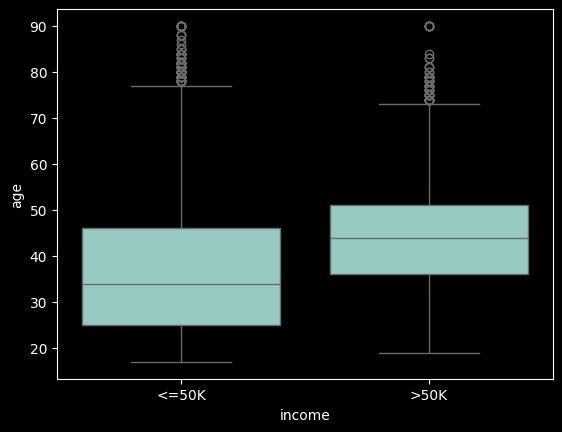

In [208]:
sns.boxplot(x='income',y='age',data=df)

<Axes: xlabel='income', ylabel='hours.per.week'>

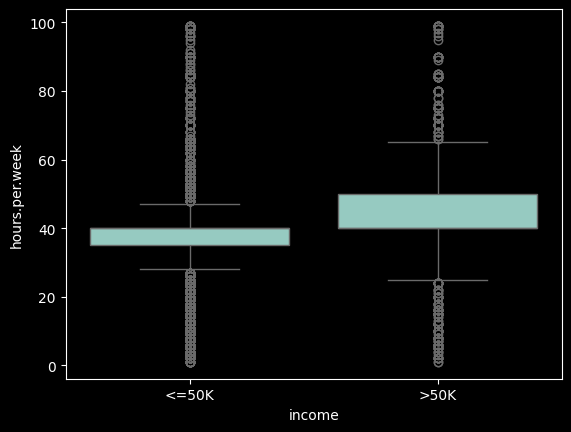

In [209]:
sns.boxplot(x='income',y='hours.per.week',data=df)

In [210]:
df.groupby(['occupation','income'])['hours.per.week'].median()

occupation         income
?                  <=50K     35.0
                   >50K      40.0
Adm-clerical       <=50K     40.0
                   >50K      40.0
Armed-Forces       <=50K     40.0
                   >50K      40.0
Craft-repair       <=50K     40.0
                   >50K      40.0
Exec-managerial    <=50K     40.0
                   >50K      45.0
Farming-fishing    <=50K     40.0
                   >50K      50.0
Handlers-cleaners  <=50K     40.0
                   >50K      40.0
Machine-op-inspct  <=50K     40.0
                   >50K      40.0
Other-service      <=50K     40.0
                   >50K      40.0
Priv-house-serv    <=50K     35.0
                   >50K      35.0
Prof-specialty     <=50K     40.0
                   >50K      40.0
Protective-serv    <=50K     40.0
                   >50K      40.0
Sales              <=50K     40.0
                   >50K      45.0
Tech-support       <=50K     40.0
                   >50K      40.0
Transport-moving   <=5

<Axes: xlabel='Net'>

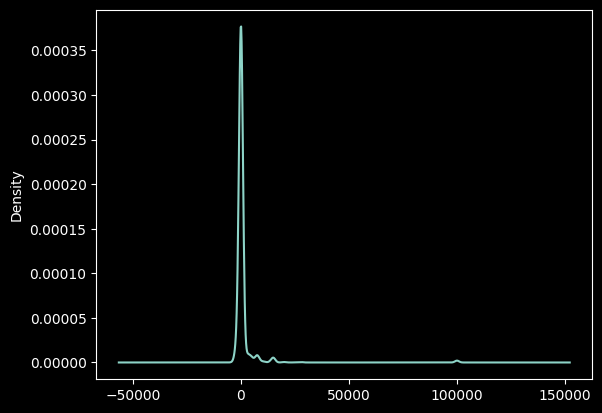

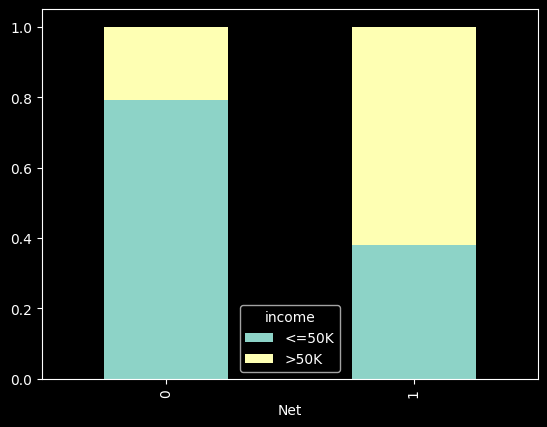

In [211]:
df['Net'] = df['capital.gain'] - df['capital.loss']
df['Net'].plot(kind='kde')
df['Net'] = np.where(df['Net']>0,1,0)
#df[df['Net']!=0]['income'].value_counts()
pd.crosstab(df['Net'],df['income'],normalize='index').plot(kind='bar',stacked=True)

In [212]:
df['occupation'] = np.where(df['occupation']=='?','Other-service',df['occupation'])
df['workclass'] = np.where(df['workclass']=='?','Other',df['workclass'])
df['occ_mar'] = df['occupation']+df['marital.status']

In [213]:
pd.crosstab(df['occ_mar'],df['income'],normalize='index').tail(15)
import scipy.stats as stats
categorical_columns = df.drop(columns=['income','age','hours.per.week','fnlwgt','capital.gain','capital.loss','Net','education.num'])
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['income'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    if p < 0.05:
        print(f'{col} and income is significant')
    else:
        print(f'{col} and income is not significant')


workclass and income is significant
education and income is significant
marital.status and income is significant
occupation and income is significant
relationship and income is significant
race and income is significant
sex and income is significant
native.country and income is significant
occ_mar and income is significant


In [214]:
import numpy as np
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Cramér's V for each feature
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['income'])
    cramers_v_value = cramers_v(contingency_table.to_numpy())
    
    print(f"Cramér's V for {col}: {cramers_v_value}\n")


Cramér's V for workclass: 0.1792076202095948

Cramér's V for education: 0.3688382910002382

Cramér's V for marital.status: 0.4474038365741476

Cramér's V for occupation: 0.3508043679264026

Cramér's V for relationship: 0.45358492718148957

Cramér's V for race: 0.10081216080655508

Cramér's V for sex: 0.21590381954916826

Cramér's V for native.country: 0.09870485674433296

Cramér's V for occ_mar: 0.5543109169252268



# Conclusions
- Males are mostly employed, males have higher chances of having 50k+ salary </br>
- Your occupation matters for salary, not education, for some occupation, higher degrees like master, prof school, doctorate, bachelors can get 50k+ salary </br>
- Higher age tends to have high salary</br>
- workclass have little impact on salary, self emp and federal gov tends to have high salary</br>
- Exce manegers, prof specialist and sales have high salary if have high education degree</br>
- Whites have comparitively high salary than other races respective of occupation</br>
- people with high hours per week earn more salary</br>
- Married people (both husband & wife) with present wife earns more salary, which is reasonable to meet family expenses</br>
- net capita higher than 0, means high salary</br>
- <b>Major Factor for prediction: </br>Which occupation you targeting? Are you married, with wife with you or not? Are you male or female?</br> Have you gained capital? Whats your age? Which workclass you targeting and with which degree?</b>

In [215]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Net,occ_mar
0,90,Other,77053,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0,Other-serviceWidowed
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,Exec-managerialWidowed
2,66,Other,186061,Some-college,10,Widowed,Other-service,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0,Other-serviceWidowed
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,Machine-op-inspctDivorced
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,Prof-specialtySeparated


# ML Model Prediction

In [216]:
for col in ['workclass','marital.status','occupation','relationship','race','occ_mar','native.country']:
    sorted_df = df.groupby(col)['income'].value_counts(normalize=True).unstack(fill_value=0).sort_values(by='>50K',ascending=False)
    sorted_df['Rank'] = sorted_df['>50K'].rank(ascending=False, method='dense').astype(int)
    ranks = np.array(sorted_df.index)
    colmap = {item: index + 1 for index, item in enumerate(ranks)}
    df[col] = df[col].map(colmap)
df['sex'] = df['sex'].map({'Female':0,'Male':1})
df['income'] = df['income'].map({'<=50K':0,'>50K':1})

In [217]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Net,occ_mar
0,90,7,77053,HS-grad,9,4,12,3,2,0,0,4356,40,19,0,0,66
1,82,6,132870,HS-grad,9,4,1,3,2,0,0,4356,18,19,0,0,22
2,66,7,186061,Some-college,10,4,12,4,3,0,0,4356,40,19,0,0,66
3,54,6,140359,7th-8th,4,3,9,4,2,0,0,3900,40,19,0,0,70
4,41,6,264663,Some-college,10,6,2,6,2,0,0,3900,40,19,0,0,20


In [218]:
x= df.drop(columns=['education','income'])
y = df['income']

In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix
dtg = DecisionTreeClassifier(random_state=2)
params = {
    'max_depth':[2,3,5,7,9,11,8]
}
dtg = GridSearchCV(dtg, param_grid=params,cv=5, n_jobs=-1)
dtg.fit(x_train,y_train)
y_pred = dtg.best_estimator_.predict(x_test)
print("Best params: ",dtg.best_params_)
print("Acurracy: ",accuracy_score(y_pred,y_test))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
featureImps = dtg.best_estimator_.feature_importances_
featImps = [f"{value:.10f}" for value in featureImps]
print("feature Importance: ",)
cols = np.array(x.columns)
for (a,b) in zip(cols,featImps):
    print((a,b))


Best params:  {'max_depth': 8}
Acurracy:  0.8567480423767849
Precision: 0.75
Recall: 0.62
F1 Score: 0.68
Confusion Matrix:
[[4609  327]
 [ 606  971]]
feature Importance: 
('age', '0.0398294565')
('workclass', '0.0023988961')
('fnlwgt', '0.0051679266')
('education.num', '0.0903145566')
('marital.status', '0.0039967399')
('occupation', '0.0005124290')
('relationship', '0.0043889565')
('race', '0.0003730120')
('sex', '0.0008907253')
('capital.gain', '0.1927433861')
('capital.loss', '0.0545327482')
('hours.per.week', '0.0278226022')
('native.country', '0.0014319615')
('Net', '0.0000000000')
('occ_mar', '0.5755966034')


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))


Accuracy: 84.57%
Precision: 0.73
Recall: 0.58
F1 Score: 0.65
Confusion Matrix:
[[4592  344]
 [ 661  916]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4936
           1       0.73      0.58      0.65      1577

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [222]:
from sklearn.naive_bayes import BernoulliNB
NaBys = BernoulliNB()
NaBys.fit(x_train,y_train)
y_pred = NaBys.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred,zero_division=1,average='weighted')
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred,zero_division=1))


Accuracy: 77.72%
Precision: 0.75
Recall: 0.22
F1 Score: 0.32
Confusion Matrix:
[[4717  219]
 [1232  345]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4936
           1       0.61      0.22      0.32      1577

    accuracy                           0.78      6513
   macro avg       0.70      0.59      0.59      6513
weighted avg       0.75      0.78      0.73      6513



In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfg = RandomForestClassifier(random_state=2,n_jobs=-1)
params = {
    'max_depth':[2,3,4,7,9,11],
    'n_estimators':[5,10,15,20],
    'oob_score':[True],
}
rfg = GridSearchCV(rfg,param_grid=params,n_jobs=-1)
rfg.fit(x_train,y_train)
y_pred = rfg.best_estimator_.predict(x_test)
print("Best params: ",rfg.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred,zero_division=1, average='weighted')
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))
print("OOB score: ",rfg.best_estimator_.oob_score_)
featureImps = rfg.best_estimator_.feature_importances_
featImps = [f"{value:.10f}" for value in featureImps]
print("feature Importance: ",)
cols = np.array(x.columns)
for (a,b) in zip(cols,featImps):
    print((a,b))


Best params:  {'max_depth': 11, 'n_estimators': 20, 'oob_score': True}
Accuracy: 86.21%
Precision: 0.86
Recall: 0.61
F1 Score: 0.68
Confusion Matrix:
[[4659  277]
 [ 621  956]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4936
           1       0.78      0.61      0.68      1577

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513

OOB score:  0.8620623464373465
feature Importance: 
('age', '0.0713182702')
('workclass', '0.0155499773')
('fnlwgt', '0.0271947516')
('education.num', '0.1131653331')
('marital.status', '0.0933231159')
('occupation', '0.0775251628')
('relationship', '0.1457963963')
('race', '0.0047740472')
('sex', '0.0198397954')
('capital.gain', '0.1852085250')
('capital.loss', '0.0409704423')
('hours.per.week', '0.0457144339')
('native.country', '0.0097322705')
('Net', '0.0133384074')
('occ_mar', '0.136549

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
